In [125]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from db_initialize import *
# here we assume that database.db only contains data from healingwell
engine = create_engine('sqlite://///Users/Johnson/Documents/nit/thesis/forum_crawler/database.db')
Session = sessionmaker(bind=engine)
Base.metadata.bind = engine
session = Session()

In [116]:
import re
def word_count(doc):
    """Function to count number of words in a string."""
    count = len(re.findall(r'\w+', doc))
    return count

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib2tikz import save as tikz_save
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

In [10]:
thread = session.query(Thread).all()
#print(len(thread.posts))
for x in range(1,20):
    print("Word Count: %d" % word_count(thread[x].body))
    print(thread[x])
    #print(len(thread[x].posts))

Word Count: 487

Title: Cheaper version of pricey prostate cancer drug. 
User: FoxRun 
Time: 2016-08-31 18:54:00 
Posts: 3
URL: http://www.healingwell.com/community/default.aspx?f=35&m=3693749 
Biolyse Pharma stymied in effort to make cheaper version of pricey prostate cancer drug.

A small Canadian company has waded into a U.S. drug price controversy by offering to make an expensive prostate cancer drug for a fraction of the price.Right now Xtandi costs U.S. patients as much as $129,000 US a year, or about $90 per pill. St. Catharines, Ont.-based Biolyse Pharma says it can make the drug for $3 a pill, or $4,400 per year, but has so far been unable to get U.S. health authorities to override the existing patent.Biolyse Pharma initially made the offer to make a cheaper version of Xtandi (enzalutamide) to the U.S. government in April. The issue resurfaced last week after pharmaceutical giant Pfizer announced it will pay $14 billion US to buy Medivation, the makers of the drug, primarily o

In [1]:
def show_statistics(array):
    import numpy as np
    print("Median is %f;" % np.median(array))
    print("Mean is %f;" % np.mean(array))
    print("Maximum is %f;" % np.max(array))
    print("Minmum is %f;" % np.min(array))

## Distributions of  participants’ contribution (initial posts) to the online forum.

In [2]:
#total number of users
num_users = session.query(User).count()
print("Total number of users: %d" % num_users)
#total number of threads
num_threads = session.query(Thread).count()
print("Total number of threads: %d" % num_threads)
#total number of posts
num_posts = session.query(Post).count()
print("Total number of posts: %d" % num_posts)

Total number of users: 6405
Total number of threads: 28800
Total number of posts: 341326


In [ ]:
users = session.query(User).all()
for user in users:
    if user.id < 1000:
        print(user)

In [8]:
user_threads = np.array([len(user.threads) for user in users])

In [9]:
np.save('user_threads', user_threads)

In [17]:
user_threads = np.load('user_threads.npy')

In [5]:
show_statistics(user_threads)

Median is 1.000000;
Mean is 4.496487;
Maximum is 843.000000;
Minmum is 0.000000;


In [ ]:
user_posts = np.array([len(user.posts)+len(user.threads) for user in users])

In [9]:
np.save('user_posts', user_posts)

In [59]:
user_posts = np.load('user_posts.npy')

In [60]:
show_statistics(user_posts)

Median is 4.000000;
Mean is 57.787041;
Maximum is 21994.000000;
Minmum is 0.000000;


In [18]:
ini_bincount = np.bincount(user_threads)
ini_prob = ini_bincount / len(user_threads)
total_bincount = np.bincount(user_posts)
total_prob = total_bincount / len(user_posts)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distributions of  participants’ contribution (initial posts) to the online forum.')
plt.xlabel(r'Number of posts $N$')
plt.ylabel(r'Prob. that a user has $N$ posts')
plt.plot(np.arange(len(ini_prob)), ini_prob, 'ro', label='Inital Posts')
plt.plot(np.arange(len(total_prob)), total_prob, 'wo', label='Total Posts')
plt.xlim([-0.1, max(user_posts)])
plt.legend()
plt.grid(True)

plt.show()
# We can also save the figure to .tex format
#tikz_save('test.tex')

NameError: name 'user_posts' is not defined

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


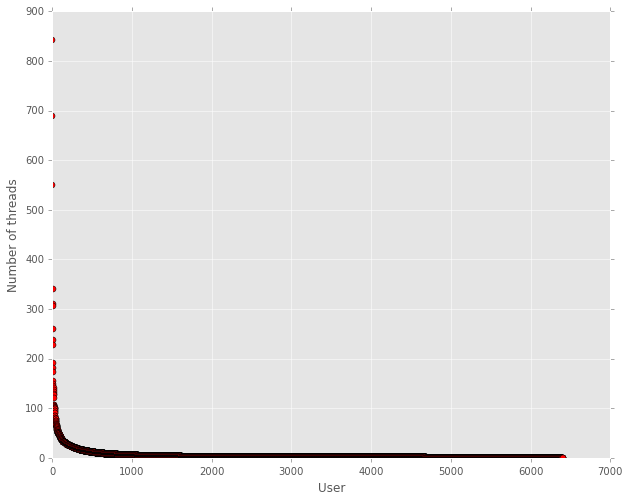

In [20]:
user_threads_1 = np.sort(np.squeeze(user_threads))
#change to descending order
user_threads_2 = user_threads_1[::-1]
style.use('ggplot')
#plt.yscale('log')
#plt.xscale('log')
#plt.title('Distribution of the number of replies to threads in the forum.')
plt.xlabel(r'User')
plt.ylabel(r'Number of threads')
plt.plot(np.arange(len(user_threads_2)), user_threads_2, 'ro')
#plt.legend()
plt.grid(True)

#plt.show()
tikz_save('users_threads_trival.tex')

## Distribution of the number of replies to threads in the forum.

In [3]:
threads = session.query(Thread).all()

In [ ]:
num_thread = session.query(Thread).count()
thread_posts = np.empty([1, num_thread],dtype="int32")
print(thread_posts)
#thread_posts = np.array([len(thread.posts) for thread in threads])
for i in range(1, num_thread+1):
    thread = session.query(Thread).get(i)
    thread_posts[0,i-1] = len(thread.posts)
    if i%50==0:
        print("%d/%d" % (i,num_thread))

In [ ]:
# Alternatively, this single line also does the job, but we can not check progress
thread_posts = np.array([len(thread.posts) for thread in threads])

In [16]:
# save the array to .npy file on disk for later use
np.save('thread_posts', thread_posts)

In [8]:
thread_posts = np.load('thread_posts.npy')

In [8]:
show_statistics(thread_posts)

Median is 8.000000;
Mean is 11.893887;
Maximum is 315.000000;
Minmum is 0.000000;


28922
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


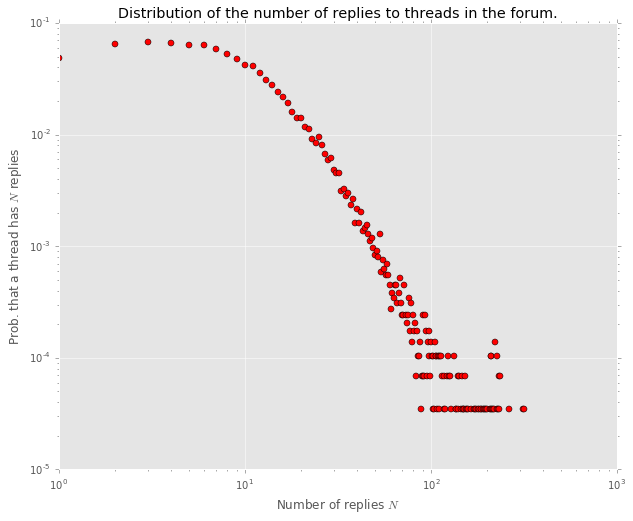

In [23]:
post_bincount = np.bincount(np.squeeze(thread_posts))
post_prob = post_bincount / thread_posts.shape[1]
print(thread_posts.shape[1])
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the number of replies to threads in the forum.')
plt.xlabel(r'Number of replies $N$')
plt.ylabel(r'Prob. that a thread has $N$ replies')
plt.plot(np.arange(len(post_prob)), post_prob, 'ro')
#plt.legend()
plt.grid(True)

#plt.show()
tikz_save('number_replies.tex')

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


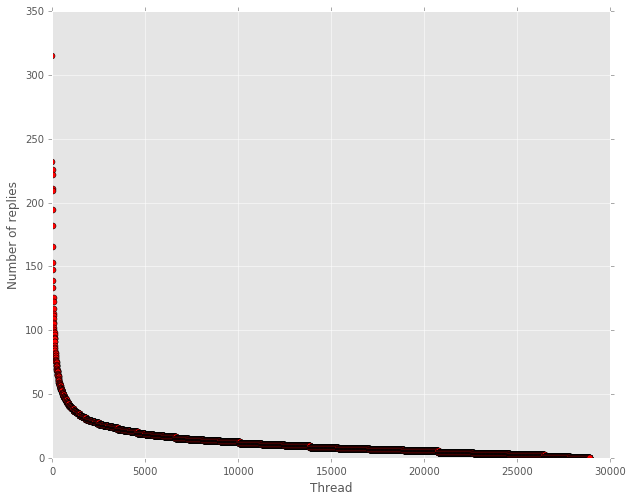

In [16]:
thread_posts_1 = np.sort(np.squeeze(thread_posts))
#change to descending order
thread_posts_2 = thread_posts_1[::-5]
style.use('ggplot')
#plt.yscale('log')
#plt.xscale('log')
#plt.title('Distribution of the number of replies to threads in the forum.')
plt.xlabel(r'Thread')
plt.ylabel(r'Number of replies')
plt.plot(np.arange(len(thread_posts_2))*5, thread_posts_2, 'ro')
#plt.legend()
plt.grid(True)

#plt.show()
tikz_save('number_posts_trival.tex')

## Distribution of the time span of threads in the forum.

In [ ]:
# function to get time span in hours
from datetime import datetime
def get_time_span(thread):
    #post_timestamps = np.array([post.timestamp for post in thread.posts], dtype='datetime64')
    # assume the last post in thread.posts is the last reply
    thread_time = datetime.strptime(thread.timestamp, '%Y-%m-%d %H:%M:%S')
    # if there is no reply, retrun 0 as time span
    if not thread.posts:
        return 0
    last_reply_time = datetime.strptime(thread.posts[-1].timestamp, '%Y-%m-%d %H:%M:%S')
    time_delta = last_reply_time - thread_time
    # calculate the time span in hours
    time_span = 24*int(time_delta.days) + time_delta.seconds//3600
    # if time span smaller than 0, there must be something wrong.
    if time_span < 0:
        print('Found unusual thread, ID is %d' % thread.id)
    return time_span

In [ ]:
num_thread = session.query(Thread).count()
thread_timespan = np.empty([1, num_thread],dtype="int32")
#thread_posts = np.array([len(thread.posts) for thread in threads])
for i in range(1, num_thread+1):
    thread = session.query(Thread).get(i)
    thread_timespan[0,i-1] = get_time_span(thread)
    if i%50==0:
        print("Processing %d/%d" % (i, num_thread))
print("Saving to file..")
np.save("thread_timespan", thread_timespan)

In [10]:
thread_time_spans = np.load('thread_timespan.npy')

In [11]:
show_statistics(thread_time_spans)

Median is 26.000000;
Mean is 778.485174;
Maximum is 97218.000000;
Minmum is 0.000000;


In [7]:
print(thread_time_spans[0:5])
num_thread = thread_time_spans.shape[1]
negative = thread_time_spans<0
# Due to a bug in crawling, the time 12:34 PM will be stored as 00:34,
# which causes negative time span. This has to be corrected.
thread_time_spans[thread_time_spans<0] += 12
print(thread_time_spans[0:5])
# Due to another unknown bug, there are still negative time spans.
# Correct them by change its sign.
thread_time_spans[thread_time_spans<0] -= 12
thread_time_spans[thread_time_spans<0] = -thread_time_spans[thread_time_spans<0]
print(thread_time_spans[0:5])
np.sum(thread_time_spans<0)
#thread_time_spans[thread_time_spans<0]
ok,problems = np.where(thread_time_spans<0)
print(problems)
for i in range(len(problems)):
    thread = session.query(Thread).get(problems[i]+1)
    print(problems[i]+1)
    print(thread.url)

[[ 114   13   23 ...,   13    2 1270]]
[[ 114   13   23 ...,   13    2 1270]]
[[ 114   13   23 ...,   13    2 1270]]
[]


file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


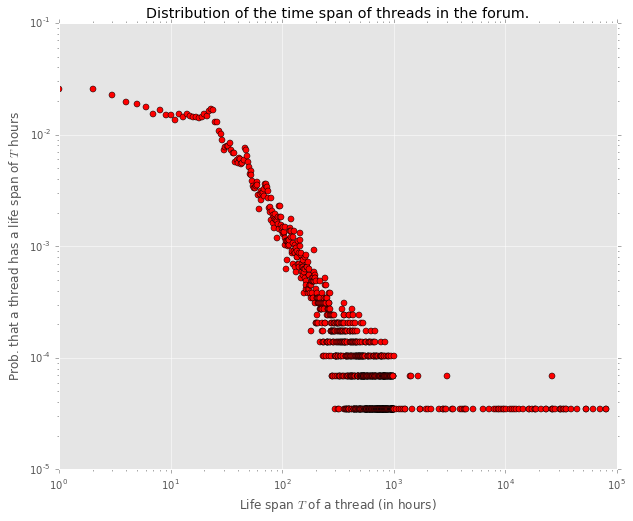

In [30]:
timespan_bincount = np.bincount(np.squeeze(thread_time_spans))
timespan_prob = timespan_bincount / num_thread
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the time span of threads in the forum.')
plt.xlabel(r'Life span $T$ of a thread (in hours)')
plt.ylabel(r'Prob. that a thread has a life span of $T$ hours')
#plt.plot(np.arange(len(timespan_prob)), timespan_prob, 'ro')
# since large figure file may exceed latex capactity,
# downsampling are needed.
first = np.arange(1000)
second = np.rint(np.linspace(1000,len(timespan_prob),5000, endpoint=False))
second = second.astype(int)
index = np.concatenate((first, second))
plt.plot(index, timespan_prob[index], 'ro')
#plt.legend()
plt.grid(True)
tikz_save('thread_time_span.tex')
plt.show()

## Distribution of the number of words in (initial) posts in the forum.

In [73]:
thread_word_count = np.load('thread_word_count.npy')
num_thread = thread_word_count.shape[1]
print(num_thread)

28800


In [16]:
show_statistics(thread_word_count)

Median is 119.000000;
Mean is 265.875069;
Maximum is 2559976.000000;
Minmum is 0.000000;


In [17]:
post_word_count = np.load('post_word_count.npy')
num_post = post_word_count.shape[1]
print(num_post)

341326


In [18]:
show_statistics(post_word_count)

Median is 60.000000;
Mean is 94.412661;
Maximum is 6326.000000;
Minmum is 0.000000;


In [7]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

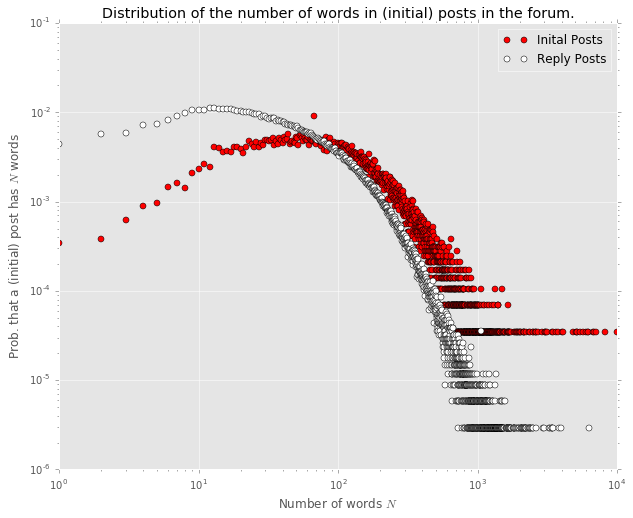

In [74]:
thread_bincount = np.bincount(np.squeeze(thread_word_count))
thread_prob = thread_bincount / num_thread
post_bincount = np.bincount(np.squeeze(post_word_count))
post_prob = post_bincount / num_post
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the number of words in (initial) posts in the forum.')
plt.xlabel(r'Number of words $N$')
plt.ylabel(r'Prob. that a (initial) post has $N$ words')
#plt.plot(np.arange(len(thread_prob)), thread_prob, 'ro', label='Inital Posts')
#plt.plot(np.arange(len(post_prob)), post_prob, 'wo', label='Reply Posts')
# since large figure file may exceed latex capactity,
# downsampling are needed.
index = np.arange(10000)
#second = np.rint(np.linspace(1000,len(timespan_prob),5000))
#second = second.astype(int)
#index = np.concatenate((first, second))
#plt.plot(index, timespan_prob[index-1], 'ro')
plt.plot(index, thread_prob[index], 'ro', label='Inital Posts')
plt.plot(np.arange(len(post_prob)), post_prob, 'wo', label='Reply Posts')
plt.legend()
plt.grid(True)
#tikz_save('post_wordcount.tex')
plt.show()

## Training data selection

In [110]:
# divide the number of words into 28 intervals, 
# which are stored in ranges. Caculate the probabilities in each range.
prob = []
ranges = []
for i in range(3):
    log = np.log10(np.arange(10))
    index_log = i + log
    index = np.rint(np.power(10, index_log[1:]))
    index_1 = np.rint(np.power(10, index_log))
    #print(index)
    #print(index_1)
    for j in range(len(index)):
        if j < len(index)-1:
            x_range = np.arange(index[j],index[j+1])
            x_range = x_range.astype(int)
            #print(np.sum(thread_prob[x_range]))
            prob.append(np.sum(thread_prob[x_range]))
            #print(prob)
            ranges.append([index[j], index[j+1]])
            #print(x_range)
            #print(prob[m])
        if j == len(index)-1:
            x_range = np.arange(index[j],index[j]+index[0])
            #print(x_range)
            x_range = x_range.astype(int)
            prob.append(np.sum(thread_prob[x_range]))
            ranges.append([index[j], index[j]+index[0]])
            #prob[m] = np.sum(thread_prob[x_range])
            #print(prob[m])
# append the case when word count is bigger than 1000
prob.append(1-sum(prob))
ranges.append([1000, np.max(thread_word_count)])
prob_np = np.array(prob)
ranges_np = np.array(ranges)
print(prob_np)
print(ranges_np)

[ 0.00034722  0.00038194  0.000625    0.00090278  0.00097222  0.00145833
  0.00163194  0.00142361  0.00211806  0.03458333  0.04239583  0.04822917
  0.04840278  0.0515625   0.05232639  0.04565972  0.04565972  0.04045139
  0.29934028  0.1371875   0.06048611  0.03413194  0.01756944  0.00979167
  0.00729167  0.00402778  0.0028125   0.00822917]
[[  1.00000000e+00   2.00000000e+00]
 [  2.00000000e+00   3.00000000e+00]
 [  3.00000000e+00   4.00000000e+00]
 [  4.00000000e+00   5.00000000e+00]
 [  5.00000000e+00   6.00000000e+00]
 [  6.00000000e+00   7.00000000e+00]
 [  7.00000000e+00   8.00000000e+00]
 [  8.00000000e+00   9.00000000e+00]
 [  9.00000000e+00   1.00000000e+01]
 [  1.00000000e+01   2.00000000e+01]
 [  2.00000000e+01   3.00000000e+01]
 [  3.00000000e+01   4.00000000e+01]
 [  4.00000000e+01   5.00000000e+01]
 [  5.00000000e+01   6.00000000e+01]
 [  6.00000000e+01   7.00000000e+01]
 [  7.00000000e+01   8.00000000e+01]
 [  8.00000000e+01   9.00000000e+01]
 [  9.00000000e+01   1.000000

/Users/Johnson/Documents/nit/thesis/crawler/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


In [176]:
# we want only 300 threads for training, 
# thus convert probabilities to numbers
counts = np.rint(prob_np * 350)
counts[np.argmax(counts)] += 350-np.sum(counts)
print(counts)

[   0.    0.    0.    0.    0.    1.    1.    0.    1.   12.   15.   17.
   17.   18.   18.   16.   16.   14.  106.   48.   21.   12.    6.    3.
    3.    1.    1.    3.]


In [177]:
num_thread = thread_word_count.shape[1]
# randomize thread ids
random = np.random.randint(1,num_thread+1,size=num_thread)

In [178]:
found_count = np.zeros(counts.shape)
#print(np.sum(found_count))
ids = []
for idx in random:
    #print(type)
    # cast to int is important
    thread = session.query(Thread).get(int(idx))
    if not thread:
        print("wrong id:%d" % idx)
    #print(thread)
    wordcount = word_count(thread.body)
    for i in range(ranges_np.shape[0]):
        # if the wordcount is in a range and there are not enough 
        # threads in that range, add it
        if wordcount in range(*ranges_np[i].astype(int)) and found_count[i]<counts[i]:
            print(*ranges_np[i].astype(int))
            print(wordcount)
            found_count[i] += 1
            ids.append(int(idx))
            print("Collected %d/300 threads" % np.sum(found_count))

0.0
70 80
74
Collected 1/300 threads
700 800
755
Collected 2/300 threads
70 80
78
Collected 3/300 threads
60 70
65
Collected 4/300 threads
80 90
84
Collected 5/300 threads
200 300
210
Collected 6/300 threads
100 200
105
Collected 7/300 threads
20 30
27
Collected 8/300 threads
70 80
73
Collected 9/300 threads
100 200
106
Collected 10/300 threads
90 100
97
Collected 11/300 threads
300 400
303
Collected 12/300 threads
200 300
217
Collected 13/300 threads
200 300
235
Collected 14/300 threads
100 200
182
Collected 15/300 threads
90 100
94
Collected 16/300 threads
10 20
17
Collected 17/300 threads
70 80
72
Collected 18/300 threads
50 60
52
Collected 19/300 threads
100 200
146
Collected 20/300 threads
70 80
71
Collected 21/300 threads
200 300
265
Collected 22/300 threads
200 300
279
Collected 23/300 threads
100 200
179
Collected 24/300 threads
100 200
157
Collected 25/300 threads
100 200
181
Collected 26/300 threads
200 300
292
Collected 27/300 threads
300 400
340
Collected 28/300 threads
100

In [179]:
print(found_count)
print(ids)

[   0.    0.    0.    0.    0.    1.    1.    0.    1.   12.   15.   17.
   17.   18.   18.   16.   16.   14.  106.   48.   21.   12.    6.    3.
    3.    1.    1.    3.]
[17390, 24218, 12245, 23253, 26252, 1943, 14620, 15254, 5201, 2130, 21304, 20745, 15493, 5433, 27208, 17751, 21346, 19675, 8969, 4675, 11926, 5565, 24282, 20421, 9046, 25367, 14351, 4067, 19938, 12145, 10825, 26863, 8876, 11792, 2906, 22950, 24999, 14748, 25375, 9504, 5185, 6594, 6869, 27489, 17848, 260, 9988, 5527, 4972, 27264, 11724, 9993, 2673, 4892, 24873, 553, 19790, 17816, 10375, 7145, 26387, 26178, 24452, 1944, 18112, 1919, 6751, 20283, 7880, 7014, 10706, 28129, 4652, 27168, 16617, 17481, 15284, 2550, 11783, 20726, 27538, 22565, 16536, 22092, 20292, 2430, 10317, 12223, 11834, 23070, 15999, 21050, 11462, 4382, 17027, 13206, 13524, 8602, 7131, 5521, 3899, 10841, 3112, 26879, 1961, 15919, 20883, 15333, 12800, 23631, 27430, 7224, 2898, 21531, 21831, 22225, 6536, 6056, 10980, 8182, 12935, 21803, 11254, 490, 3813, 1

In [181]:
# write training data to .csv
import csv
with open('posts.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    i = 1
    spamwriter.writerow(["index", "thread_id", "title", "url", "post time", "post body", "word count"])
    for id in ids:
        thread = session.query(Thread).get(id)
        spamwriter.writerow([i, id, thread.title, thread.url, thread.timestamp, thread.body, word_count(thread.body)])
        i += 1

In [21]:
# write repleis to threads to .csv
import csv
with open('replies_to_threads.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["number of replies"])
    for posts in thread_posts_1:
        spamwriter.writerow([posts])

In [2]:
a = [17390, 24218, 12245, 23253, 26252, 1943, 14620, 15254, 5201, 2130, 21304, 20745, 15493, 5433, 27208, 17751, 21346, 19675, 8969, 4675, 11926, 5565, 24282, 20421, 9046, 25367, 14351, 4067, 19938, 12145, 10825, 26863, 8876, 11792, 2906, 22950, 24999, 14748, 25375, 9504, 5185, 6594, 6869, 27489, 17848, 260, 9988, 5527, 4972, 27264, 11724, 9993, 2673, 4892, 24873, 553, 19790, 17816, 10375, 7145, 26387, 26178, 24452, 1944, 18112, 1919, 6751, 20283, 7880, 7014, 10706, 28129, 4652, 27168, 16617, 17481, 15284, 2550, 11783, 20726, 27538, 22565, 16536, 22092, 20292, 2430, 10317, 12223, 11834, 23070, 15999, 21050, 11462, 4382, 17027, 13206, 13524, 8602, 7131, 5521, 3899, 10841, 3112, 26879, 1961, 15919, 20883, 15333, 12800, 23631, 27430, 7224, 2898, 21531, 21831, 22225, 6536, 6056, 10980, 8182, 12935, 21803, 11254, 490, 3813, 11449, 22987, 25902, 22637, 23448, 2702, 25586, 8918, 24062, 28672, 23309, 454, 28010, 3037, 23038, 766, 22747, 18316, 7963, 417, 18501, 21253, 14002, 11722, 16465, 2203, 5337, 9779, 1897, 9000, 2754, 1218, 7659, 7359, 17423, 15075, 6832, 9224, 18118, 4927, 22193, 20156, 17767, 23452, 15865, 23072, 24288, 26278, 14643, 13943, 10542, 20482, 14055, 15486, 7687, 18704, 22203, 8688, 4787, 25338, 28668, 9011, 15781, 15963, 18209, 19823, 18044, 6783, 13709, 26731, 13648, 15613, 8364, 5121, 4612, 26421, 13281, 17249, 25385, 9732, 12316, 16150, 16307, 560, 10059, 15775, 2856, 15208, 20275, 23601, 19420, 15489, 3904, 27421, 26175, 28101, 24665, 26301, 19617, 18764, 21107, 26250, 7024, 15150, 14258, 20493, 14931, 25864, 2328, 14248, 599, 21743, 10412, 8792, 2538, 10536, 24008, 3757, 1132, 25612, 1130, 23410, 12190, 24482, 23806, 15920, 11278, 22460, 10824, 22112, 4169, 26233, 14877, 1465, 9815, 20685, 1876, 18633, 2343, 22293, 5668, 11623, 22394, 6149, 21167, 15347, 23951, 5699, 2699, 15114, 6154, 28224, 13551, 20827, 17522, 921, 15003, 25069, 18672, 8646, 7017, 24119, 5039, 8831, 15127, 12063, 14340, 23348, 4387, 26817, 27977, 17437, 18848, 12844, 6759, 9343, 20628, 4437, 24747, 4205, 24346, 28179, 17073, 11331, 24463, 2249, 2040, 8533, 5685, 3941, 2418, 19654, 714, 26798, 10878, 12869, 24896, 6248, 5205, 26150, 28230, 18023, 9693, 10404, 2056, 25483, 22485, 5528, 12366, 31, 943, 19239, 12891, 19496, 15760, 10023, 3851, 19041, 23735, 11633, 10023, 22103, 8092, 12832, 8483]

In [3]:
np.save("outputs/post_ids",a)